In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd
import seaborn as sns

import vdmlab as vdm
from core import Rat, combine_rats
from load_data import assign_label, load_biconditional_events_general, vdm_assign_label

In [2]:
data_filepath = 'E:/code/emi_biconditional/cache/data/winter2017'

In [3]:
rats = ['R120', 'R121', 'R118', 'R119', 'R116', 'R117', 'R114']
other_rat = 'R115'

groups = [1, 2, 1, 2, 1, 2, 1]

group1 = ['R120', 'R118', 'R116', 'R114']
group2 = ['R121', 'R119', 'R117']

In [55]:
session_id = '2017-01-22'
this_rat = 'R114'

In [56]:
filename = os.path.join(data_filepath, '!' + session_id)

In [57]:
data = dict()
for rat in rats:
    data[rat] = Rat(rat, group1, group2)

rats_data = vdm.load_medpc(filename, assign_label)

In [58]:
trial_order = []
for trial in ['trial1', 'trial2', 'trial3', 'trial4']:
    for start, stop in zip(rats_data[rat][trial].starts, rats_data[rat][trial].stops):
        trial_order.append((trial, vdm.Epoch(start, stop-start)))

In [59]:
ordered = sorted(trial_order, key=lambda x: x[1].start)

In [60]:
mags = rats_data[this_rat]['mags']
sounds1 = rats_data[this_rat]['sounds1']
sounds2 = rats_data[this_rat]['sounds2']

durations = []
for t in ordered:
    trial = t[0]
    trial_epoch = t[1]
    
    if trial in ['trial1', 'trial4']:
        sound_epochs = trial_epoch.intersect(sounds2)
        cue_mags = sound_epochs.intersect(mags)
        durations.append(np.sum(cue_mags.durations))
    if trial in ['trial2', 'trial3']:
        sound_epochs = trial_epoch.intersect(sounds1)
        cue_mags = sound_epochs.intersect(mags)
        durations.append(np.sum(cue_mags.durations))

In [61]:
trials = []
for y in ordered:
    trials.append(y[0])

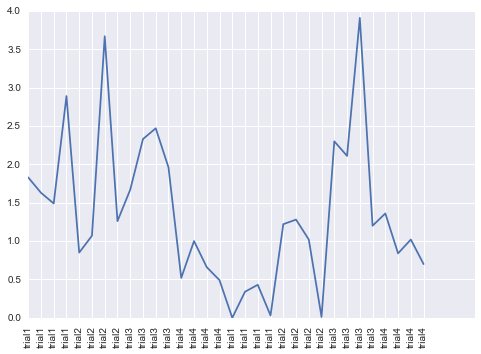

In [62]:
plt.plot(durations)
plt.xticks(range(32), trials, rotation='vertical')
plt.show()

In [ ]:
df = combine_rats(data, rats, n_sessions=1)

In [ ]:
df.head()

In [ ]:
k = df.loc[(df.rat == 'R114') & 
           (df.measure == 'durations') & 
           (df.cue == 'sound')]

In [ ]:
k.shape

In [ ]:
plt.plot(k.value)
plt.show()

In [ ]:
%matplotlib inline
import vdmlab as vdm
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from core import assign_label, Rat, combine_rats
from plotting import plot_behavior

In [ ]:
home = os.path.expanduser("~")
root = os.path.join(home, 'code', 'emi_biconditional')
data_filepath = os.path.join(root, 'cache', 'data')
split_data_filepath = os.path.join(root, 'cache', 'other')
output_filepath = os.path.join(root, 'plots')

In [ ]:
sessions = []
for file in sorted(os.listdir(data_filepath)):
    if file[0] == '!':
        sessions.append(os.path.join(data_filepath, file))

rats = ['1', '2', '3', '4', '5', '6', '7', '8']

data = dict()
for rat in rats:
    data[rat] = Rat(rat)

broken_a = os.path.join(split_data_filepath, '!2016-10-19a1')
broken_b = os.path.join(split_data_filepath, '!2016-10-19a2')
rats_data_a = vdm.load_medpc(broken_a, assign_label)
rats_data_b = vdm.load_medpc(broken_b, assign_label)
for rat in rats_data_a:
    for key in rats_data_a[rat]:
        rats_data_b[rat][key].join(rats_data_a[rat][key])

for rat in rats:
    data[rat].add_session(**rats_data_b[rat])

for session in sessions:
    rats_data = vdm.load_medpc(os.path.join(data_filepath, session), assign_label)

    for rat in rats:
        data[rat].add_session(**rats_data[rat])

n_sessions = len(data['1'].sessions)
only_sound = False

df = combine_rats(data, rats, n_sessions, only_sound)

In [ ]:
def fix_missing_trials(df):
    nan_idx = np.where(np.isnan(df['value']))[0]
    for idx in nan_idx:
        row = df.loc[idx]
        value = df.loc[(df['rat'] == row['rat']) & 
                       (df['session'] == row['session']) & 
                       (df['condition'] == row['condition']) & 
                       (df['measure'] == row['measure'])].mean()['value']

        df.set_value(idx, 'value', value)

In [ ]:
fix_missing_trials(df)

In [ ]:
np.sum(np.isnan(df['value']))

In [ ]:
plot_behavior(df, ['1'], only_sound=False, by_outcome=True)